<a href="https://colab.research.google.com/github/ilhanshk/personality-prediction/blob/main/IDS_CA2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving mypersonality_with_sentiment.csv to mypersonality_with_sentiment (1).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9917 entries, 0 to 9916
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   #AUTHID       9917 non-null   object 
 1   STATUS        9917 non-null   object 
 2   sEXT          9917 non-null   float64
 3   sNEU          9917 non-null   float64
 4   sAGR          9917 non-null   float64
 5   sCON          9917 non-null   float64
 6   sOPN          9917 non-null   float64
 7   cEXT          9917 non-null   object 
 8   cNEU          9917 non-null   object 
 9   cAGR          9917 non-null   object 
 10  cCON          9917 non-null   object 
 11  cOPN          9917 non-null   object 
 12  DATE          9917 non-null   object 
 13  NETWORKSIZE   9917 non-null   float64
 14  BETWEENNESS   9917 non-null   float64
 15  NBETWEENNESS  9917 non-null   float64
 16  DENSITY       9917 n

<ipython-input-2-8f1a617889e4>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TRANSITIVITY'].fillna(df['TRANSITIVITY'].mean(), inplace=True)


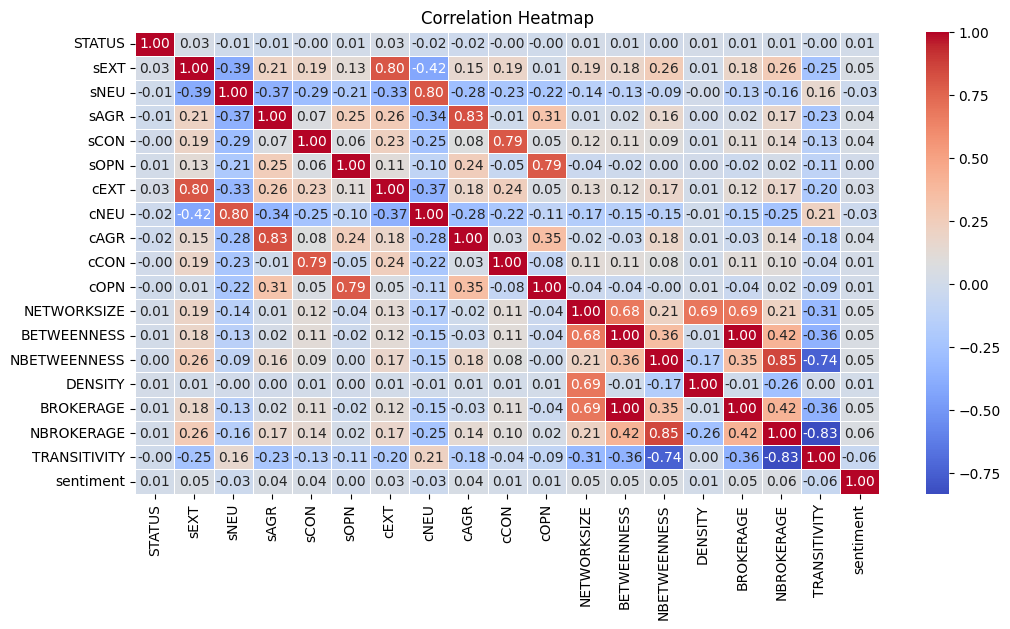

<Figure size 1000x500 with 0 Axes>

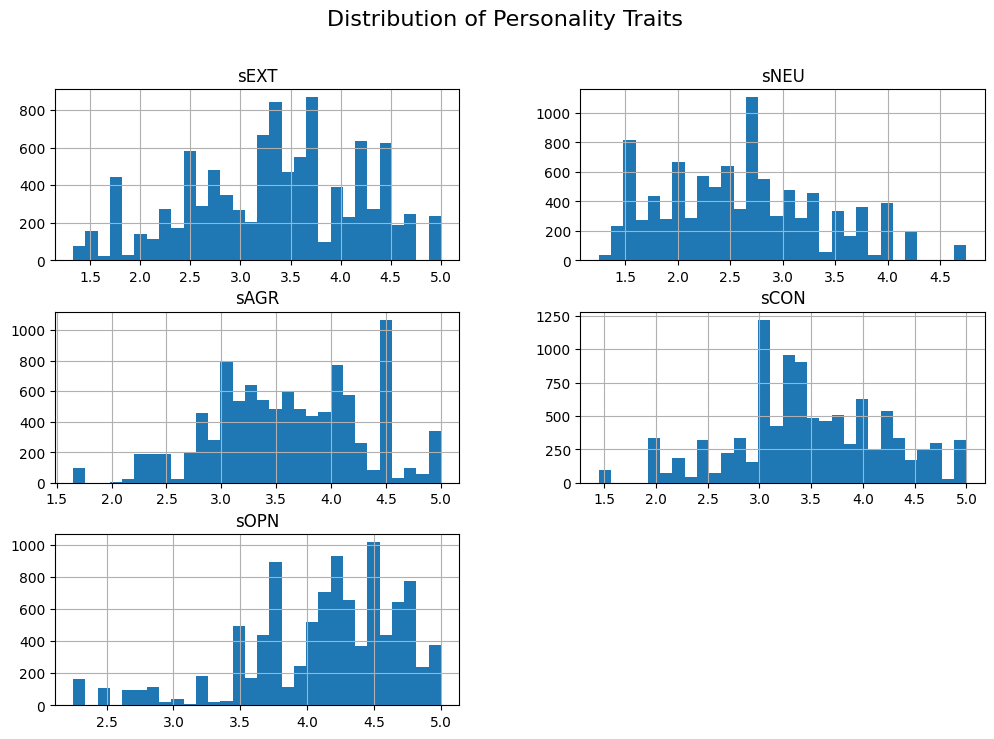

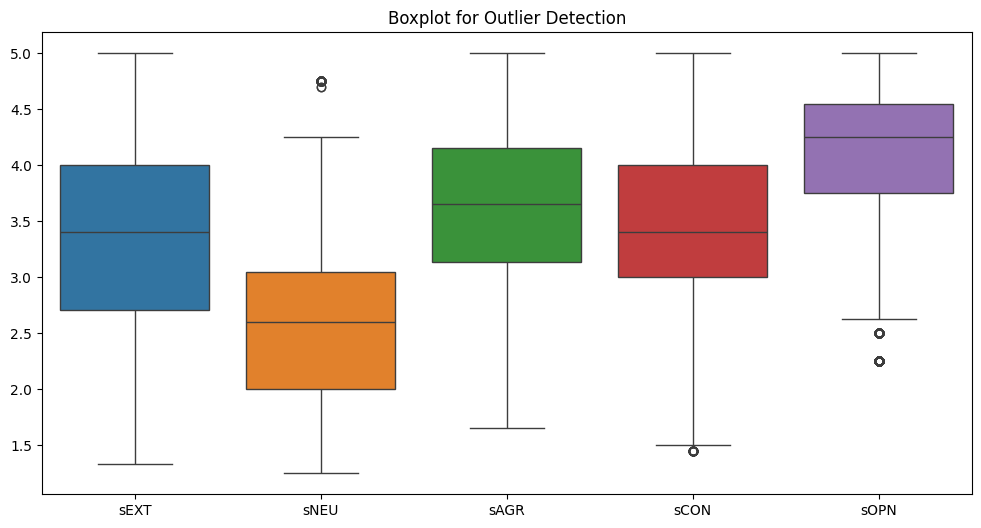

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:08:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 XGBoost Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
RMSE: 0.0000
R² Score: 1.0000


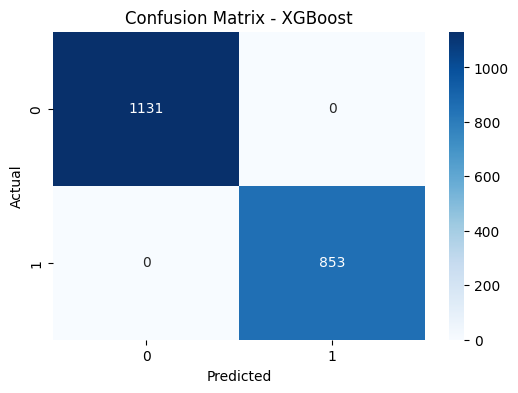

<Figure size 800x600 with 0 Axes>

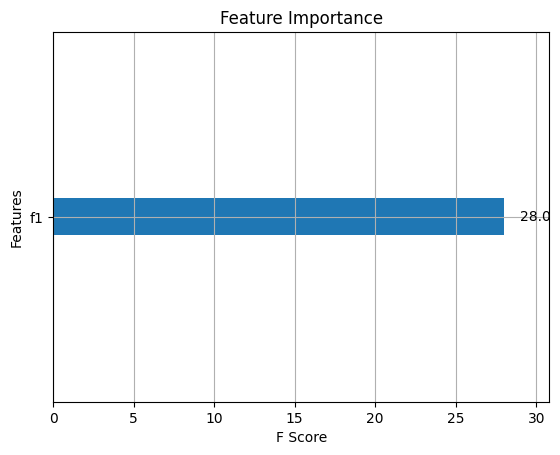


🔹 Random Forest Performance:
Accuracy: 0.4682
Precision: 0.4350
Recall: 0.4682
F1 Score: 0.4186
RMSE: 1.0234
R² Score: -0.6966


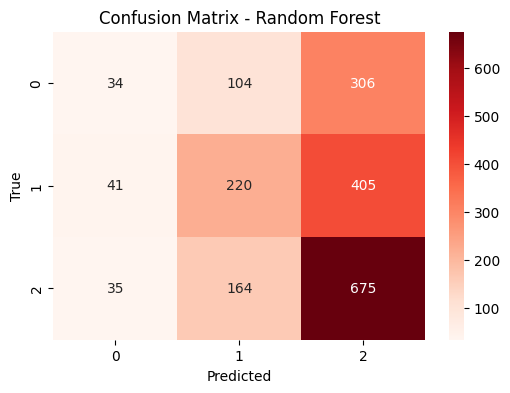

<ipython-input-2-8f1a617889e4>:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette=['blue', 'red'])


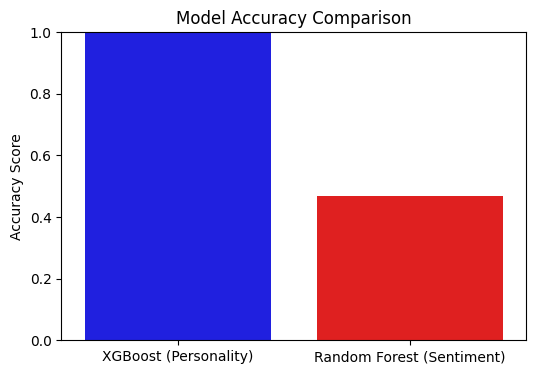


📌 Final Comparison of Models:
✅ XGBoost Model Accuracy (Personality Prediction): 1.0000
✅ Random Forest Model Accuracy (Sentiment Analysis): 0.4682

🎯 **Conclusion: XGBoost outperforms Random Forest.**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# 🔹 Upload File
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# ------------------- 🔥 Data Cleaning & Preprocessing -------------------

# Display dataset info
print("Dataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop unnecessary columns
df.drop(columns=['#AUTHID', 'DATE'], inplace=True, errors='ignore')

# Fill missing values for numerical columns
if 'TRANSITIVITY' in df.columns:
    df['TRANSITIVITY'].fillna(df['TRANSITIVITY'].mean(), inplace=True)

# Encode categorical columns
categorical_cols = ['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].map({'y': 1, 'n': 0})

# Convert text to lowercase
if 'STATUS' in df.columns:
    df['STATUS'] = df['STATUS'].str.lower()

# Encode all categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display cleaned data
print("\nCleaned Data Preview:")
print(df.head())

# Select numeric columns for visualization
numeric_df = df.select_dtypes(include=['number'])

# ------------------- 🔥 Exploratory Data Analysis (EDA) -------------------

# 1️⃣ Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 2️⃣ Distribution of Personality Traits
plt.figure(figsize=(10, 5))
df[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of Personality Traits", fontsize=16)
plt.show()

# 3️⃣ Outlier Detection using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']])
plt.title("Boxplot for Outlier Detection")
plt.show()

# ------------------- 🔥 Personality Prediction Model (XGBoost) -------------------

# Define Features (X) and Target (y)
target_col = 'cEXT'
X = df.drop(columns=[target_col])
y = df[target_col]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate performance metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(y_test, y_pred_xgb, average='binary')
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display XGBoost Performance
print("\n🔹 XGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")

# 📌 Confusion Matrix for XGBoost
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# 📌 Feature Importance Plot
plt.figure(figsize=(8,6))
xgb.plot_importance(xgb_model, importance_type='weight', title="Feature Importance", xlabel="F Score")
plt.show()

# ------------------- 🔥 Sentiment Analysis Model (Random Forest) -------------------

# Define Features (X) and Target (y) for Sentiment Analysis
df_cleaned = df.drop(columns=["STATUS", "cEXT", "cNEU", "cAGR", "cCON", "cOPN"], errors='ignore')
df_cleaned = df_cleaned.dropna()
X_sentiment = df_cleaned.drop(columns=["sentiment"], errors='ignore')
y_sentiment = df_cleaned["sentiment"]

# Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_s, y_train_s)

# Predictions
y_pred_rf = rf_model.predict(X_test_s)

# Calculate performance metrics
rf_accuracy = accuracy_score(y_test_s, y_pred_rf)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test_s, y_pred_rf, average='weighted')
rmse_rf = np.sqrt(mean_squared_error(y_test_s, y_pred_rf))
r2_rf = r2_score(y_test_s, y_pred_rf)

# Display Random Forest Performance
print("\n🔹 Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

# 📌 Confusion Matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_s, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 📌 Accuracy Comparison Bar Chart
plt.figure(figsize=(6,4))
models = ['XGBoost (Personality)', 'Random Forest (Sentiment)']
accuracies = [xgb_accuracy, rf_accuracy]
sns.barplot(x=models, y=accuracies, palette=['blue', 'red'])
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()

# 📌 Final Comparison
print("\n📌 Final Comparison of Models:")
print(f"✅ XGBoost Model Accuracy (Personality Prediction): {xgb_accuracy:.4f}")
print(f"✅ Random Forest Model Accuracy (Sentiment Analysis): {rf_accuracy:.4f}")

if xgb_accuracy > rf_accuracy:
    print("\n🎯 **Conclusion: XGBoost outperforms Random Forest.**")
else:
    print("\n🎯 **Conclusion: Random Forest outperforms XGBoost.**")


In [2]:
!git config --global user.name "ilhanshk"
!git config --global user.email "ass014@chowgules.ac.in"
